In [1]:
import pandas as pd

In [2]:
pima = pd.read_csv("https://github.com/SavioSal/datasets/raw/master/diabetes.csv")

In [3]:
pima. head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X= pima.iloc[:,range(0,8)]
y= pima.Outcome


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [6]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=1)

In [7]:
clf = DecisionTreeClassifier(criterion="entropy")

In [8]:
dtmodel = clf.fit(X_train,y_train)

In [9]:
y_pred = dtmodel.predict(X_test)

In [10]:
pip install dtreeplt

In [11]:
from dtreeplt import dtreeplt

C:\Users\hp\anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


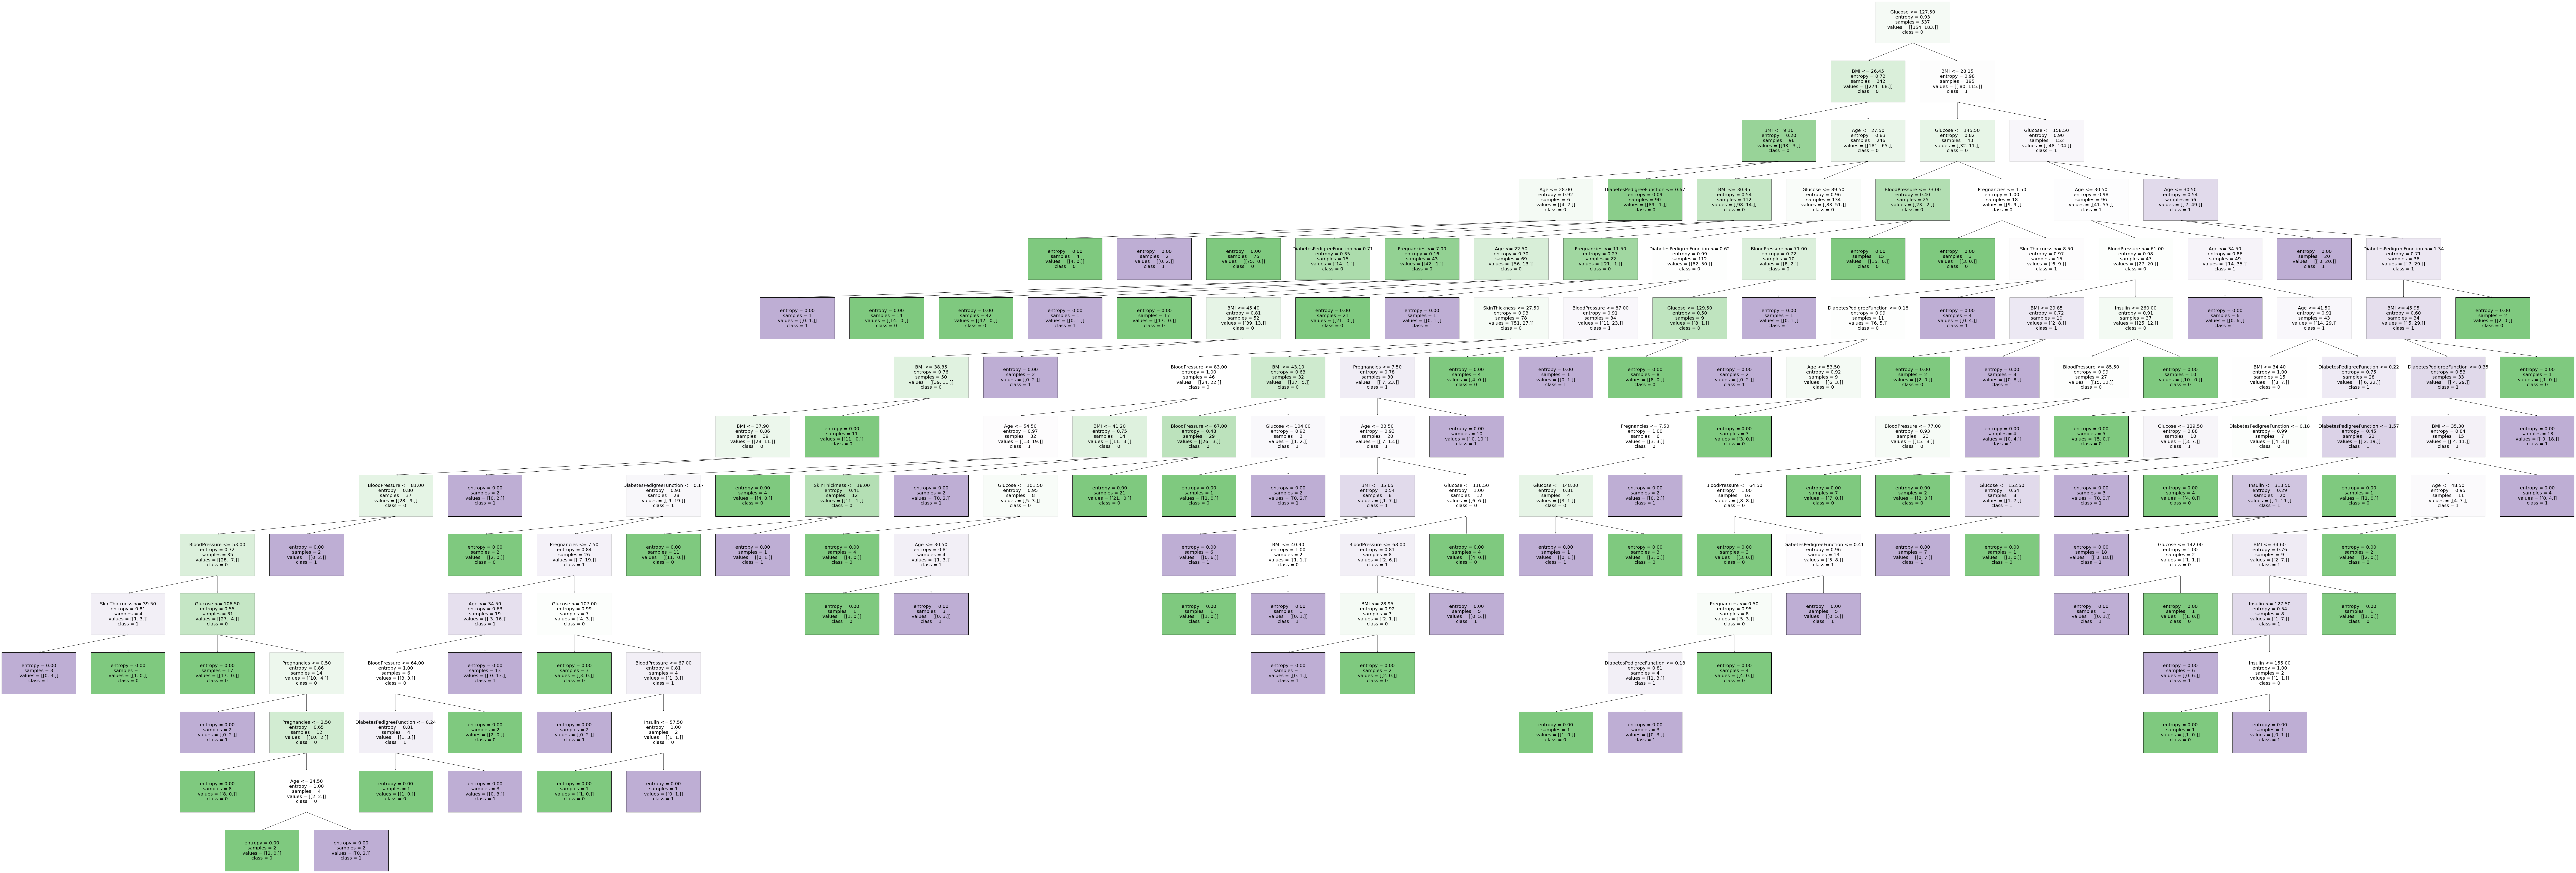

In [12]:
dtree = dtreeplt(
    model=dtmodel,
    feature_names=X_train.columns.values,
    target_names=['0','1']
)
fig = dtree.view()
fig.savefig('output.png')

In [13]:
from sklearn import metrics

In [14]:
print ("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7359307359307359


In [15]:
#logestic Regrassion 
#formula: log(1/1-p)=mx+c

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg= LogisticRegression()
lgmodel=lg.fit(X_train,y_train)

In [18]:
y_pred= lgmodel.predict(X_test)

In [19]:
print ("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7835497835497836


In [20]:
lgmodel.coef_

array([[ 0.10143077,  0.03358647, -0.01571088, -0.00134887, -0.00069744,
         0.08943666,  0.56049284,  0.01705782]])

In [21]:
dtmodel.feature_importances_

array([0.07889789, 0.26358787, 0.12069825, 0.03718279, 0.03410513,
       0.20415012, 0.11763319, 0.14374476])

In [22]:
X.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [23]:
s=dtmodel.feature_importances_

In [24]:
s.sort()
print(s)

[0.03410513 0.03718279 0.07889789 0.11763319 0.12069825 0.14374476
 0.20415012 0.26358787]


In [ ]:
#optimizing the model
#grid search for improve the accuracy 

In [26]:
from sklearn.model_selection import GridSearchCV

In [25]:
dtmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [44]:
datagrid_model=GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth':range(1,10),'max_features':range(1,10), 'max_leaf_nodes':range(1,10)})

In [45]:
dmodel = datagrid_model.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 293, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters

In [46]:
dmodel.best_params_

{'max_depth': 8, 'max_features': 4, 'max_leaf_nodes': 3}

In [48]:
dmodel.best_score_

0.7560747663551401

In [49]:
#set the parameters

In [50]:
dtclf= DecisionTreeClassifier()

In [51]:
dtmodel=dtclf.fit(X_train,y_train)

In [53]:
dtmodel.set_params(max_depth=8, max_features= 4, max_leaf_nodes= 3)

DecisionTreeClassifier(max_depth=8, max_features=4, max_leaf_nodes=3)

In [55]:
y_pred = dtmodel.predict(X_test)

In [56]:
print ("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7012987012987013
